In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint
from scipy.stats import zscore

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz


In [2]:
df = pd.read_csv("diabetes.csv")   ## by using pandas library the data is being loaded.

df = df.rename(columns={"Outcome": "label"})  # I change last column name from Outcome to label

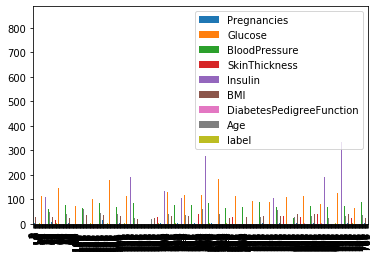

In [3]:
df.plot(kind='bar')  ## Plotting the raw data as a bar chart
plt.show()

In [4]:
new_df=df.iloc[:,:-1]              ## I extracted all features in new dataframe named new_df except target variable. 
                                   ## OR I can say that I dropped target varirable in order to apply data standardization.

new_df=new_df.apply(zscore)        ## Here, I have applied z-score normilzation on new dataframe i.e new_df. 

df.iloc[:,:-1]=new_df              ## Here, I assigned all values to actual data frame after data standardization 

df.columns[-1] # I just checked whether last column name has sucessfully changed or not.

'label'

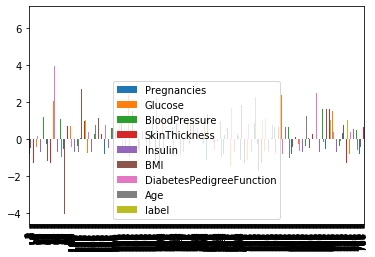

In [5]:
df.plot(kind='bar') # I have done data standardization and then plotting the parepared data as a bar chart
plt.show()

In [6]:
def train_test_split(df, test_size):  # I use this block when I evaluated model by Multiple Random Sampling method
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

random.seed(0) 
train_df, test_df = train_test_split(df, test_size=0.5) # I partitioned training and testing set by using train_test_split function

In [7]:
"""train_df=df.iloc[0:614,:] # I partitioned training and testing set here.
                              # I use this block when I evaluated model by K-Fold cross validation
test_df=df.iloc[614:,:]
"""

'train_df=df.iloc[0:614,:] # I partitioned training and testing set here.\n                              # I use this block when I evaluated model by K-Fold cross validation\ntest_df=df.iloc[614:,:]\n'

In [8]:
train=train_df.iloc[:,:-1]
target=train_df.iloc[:,-1]
clf = tree.DecisionTreeClassifier() # By using sklearn python library, here I register model as clf.

clf = clf.fit(train, target)  # Here newList1 is training features and target1 is training target variable. 

pprint(clf)                   # Display the credential of Decison Tree Predictive Model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [10]:
t=["0","1"] # The target values are used in generating graph
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=df.columns[0:-1],  
                                class_names=t,  
                                filled=True, rounded=True,  
                                special_characters=False) 
graph = graphviz.Source(dot_data) # graphiviz is python-based library which is used for various kinds of visualization


graph.format = "png"             # Here the image is being saved with png format
graph.render("Decision Tree")    # The image name is Decision Tree which is being saved in same folder.

'Decision Tree.png'

In [ ]:
data = np.array(test_df.iloc[:,:-1]) # For computing the test data length
totalTest=(len(data))
target=np.array(test_df.iloc[:,-1]) # Extracted actual target value of test which would be used to calculate the accuracy of model in the next block.


In [ ]:
result=[]

for i in range(0,totalTest):
    t=clf.predict([data[i]])
    result.append(t[0])
count=0

for i in range(0,totalTest):
    if result[i]==target[i]:
       count+=1
    
count/totalTest             # This accuracy is calculate here